<b> MIS 382N: ADVANCED MACHINE LEARNING<b>

Assignment 2

Total points: 70
    
Team Members:
    
    Parthiv Borgohain (pb25347)
    Rajshree Mishra (rm62528)

Due: Friday, September 23 to be submitted via Canvas by 11:59 pm

Your homework should be written in a python notebook. If you prefer, you can work in groups of two. **Please note that only one student per team needs to submit the assignment on Canvas but make sure to include both students' names and UT EIDs.**

For any question that requires a handwritten solution, you may upload scanned images of your solution in the notebook or attach them to the assignment . You may write your solution using markdown as well.

Please make sure your code runs and the graphs and figures are displayed in your notebook before submitting. (%matplotlib inline)

# AML ASSIGNMENT 2

    

# Question 1: Bias and Variance (10 pts)

(a). (4 pts) Describe the difference between model bias and the bias of a point estimator. 

(b) (6 pts). How can you use a learning curve to determine whether a model is overfitting  (for a given sample size)? Discuss this with respect to the observed train and validation error curves. How does your answer change if the model you are trying to determine if the model is underfitting?

# Answer : 
**(a)** Model Bias is the systematic error that occurs in the Machine Learning Model itself due to incorrect assumptions being made about the nature of the model. A model with higher bias does not match the dataset closely. A low bias model will closely match the training data set but will not fit well with unseen test data due to the bias-variance tradeoff. A model with low complexity has higher model bias while increasing the complexity of the model will reduce its model bias.

Point Estimators are functions that are used to find the value of a population parameter from a sample parameter. The bias of a point estimator is the expected difference between the estimator value and the true parameter. An estimator is unbiased if its bias is equal to 0, and biased otherwise

**(b)** Learning curves make it easy to visualize how the training and test error change with respect to model complexity. Learning curves help us in identifying whether adding additional training examples would improve the validation score (score on unseen data). 

The learning curve of an overfit model has a very low training loss at the beginning which gradually increases with the addition of more training data points. For the validation curve, initially the validation loss is very high which drops when more training data is added and does not flatten. So adding more training data can improve the performance of the model on unseen data.

For an underfit model, the training loss is low in the beginning. The training error increases upon adding more training data points and then falls quickly to a minimum point. For the validation learning curve, adding more training data points initially lowers the validation error and then suddenly falls to a minimum. After this point is reached, the addition of more training data points cannot improve model performance

# Question 2: Bias-Variance Exploration (20 pts)
We want to build a model that can predict y for unknown inputs x.

(a) (10 pts) Fit polynomial models of degrees 2, 4, 7 to the training data. Print out the mean squared error (on both train and test sets) for all the models. Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (predictions on x_all by different models vs x_all), and the predictions on the test set (predictions on x_test by different models vs x_test). All the plots must be in the same figure and be clearly labeled. Tips: you can use np.vander(np.squeeze(x_train), deg+1) to generate the deg-degree polynomial vector of x_train. For example, np.vander(np.squeeze(x_train), 3) gives you the second-degree polynomial of x_train.

(b) (5 pts) Which model gives the best performance? Explain in terms of the bias-variance tradeoff.

(c) (5 pts) Analyse how the training data size affects the bias and the variance of the models. For this, run the analysis in (a) using 20, 40, 60, 80 and all 100 data points. Make a single plot of the  𝑙𝑜𝑔(𝑀𝑆𝐸)  for both the training and the test data vs the size of the training set for each of the polynomials. State the trends you see as you change the size of the training data on each of the models and explain why you see them. You can use the following codes to load the dataset and complete the analysis:

##### Answer:

**(a)**

In [26]:
from sklearn import linear_model as lm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [27]:
data_load = np.load('./data.npy', allow_pickle = True)

In [28]:
x_train = data_load.item().get("Xtrain")
y_train = data_load.item().get("Ytrain")
x_test = data_load.item().get("Xtest")
y_test =data_load.item().get("Ytest")
x_all = np.linspace(-3.5,3.5,101).reshape(-1,1) #changing x_all because otherwise the plot is not visually interpretable

lrp = LinearRegression()

In [29]:
def plot_curves(x_train, y_train, x_test, y_test):
  # Fit polynomial models of degrees 2, 4, 7 to the training data. 
  # Print out the mean squared error (on both train and test sets) for all the models. 
  # Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (predictions on x_all by different models vs x_all), and the predictions on the test set (predictions on x_test by different models vs x_test). 
  list_of_degrees = [2,4,7]
    
  plt.clf()
  plt.figure(figsize=(7, 5))
  plt.rcParams["figure.autolayout"] = True
  plt.scatter(x_train,y_train,color='blue',label='Training Data Points')
  plt.scatter(x_test,y_test,color='red',label='Test Data Points')

  count=0
  train_mse=[]
  test_mse=[]
  colors1 = ['black','lime','orange']
  colors2 = ['teal','magenta','brown']

  for deg in list_of_degrees:
      x_train_poly=np.vander(np.squeeze(x_train), deg+1) #creating Vandermonde matrix for training
      x_test_poly=np.vander(np.squeeze(x_test), deg+1)  #creating Vandermonde matrix for test
      x_all_poly=np.vander(np.squeeze(x_all), deg+1) #creating Vandermonde matrix for all
    
      poly_model_train=lrp.fit(x_train_poly,y_train)
      y_pred_train=lrp.predict(x_train_poly)
      y_pred_test=lrp.predict(x_test_poly) 
      y_pred_all=lrp.predict(x_all_poly)
    
      print('MSE for order',deg,'polynomial model on training set is',mean_squared_error(y_train,y_pred_train))
      print('MSE for order',deg,' polynomial model on test set is',mean_squared_error(y_test,y_pred_test))
      
      train_mse.append(mean_squared_error(y_train,y_pred_train))
      test_mse.append(mean_squared_error(y_test,y_pred_test))
        
      new_x_all, new_y_pred_all = zip(*sorted(zip(x_all, y_pred_all)))
      new_x_test, new_y_pred_test = zip(*sorted(zip(x_test, y_pred_test)))
        
      plt.plot(new_x_all,new_y_pred_all,color=colors1[count],linewidth=1,label="degree %d polynomial fit on x_all" %deg)
      plt.scatter(new_x_all,new_y_pred_all,s=10,color=colors1[count])
    
      plt.plot(new_x_test,new_y_pred_test,color=colors2[count],linewidth=1,label="degree %d polynomial fit on x_test" %deg)
      plt.scatter(new_x_test,new_y_pred_test,s=10,color=colors2[count])    
    
      plt.legend(loc='upper left') 
      count=count+1
    
  plt.show()  
  
  # YOUR CODE COMES HERE
  print("IMPLEMENT ME!")
  return train_mse, test_mse

MSE for order 2 polynomial model on training set is 247.29679797371534
MSE for order 2  polynomial model on test set is 320.0640834697786
MSE for order 4 polynomial model on training set is 31.72001805729004
MSE for order 4  polynomial model on test set is 31.292082886606718
MSE for order 7 polynomial model on training set is 30.677193592109738
MSE for order 7  polynomial model on test set is 33.410694077690145


<Figure size 432x288 with 0 Axes>

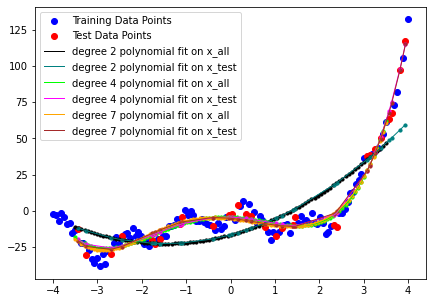

IMPLEMENT ME!


In [30]:
# Fit the different polynomials to the training data and make the plots 
train_rmses_100, test_rmses_100 = plot_curves(x_train, y_train, x_test, y_test)

**(b)**

Degree 4 polynomial has the lowest test MSE. So it is performing better on test data than the other models. The degree 7 polynomial also has similar test and training MSEs as the degree 2 polynomial but its test MSE is slightly higher. The Degree 2 polynomial fit clearly performs much worse than the other two models and is underfitting. So, clearly among the given polynomial models, the degree 4 polynomial is performing the best.

This can be understood through the Bias-Variance Tradeoff. As the model becomes more complex, when we move from degree 2 to 4 to 7, the training error keeps reducing. But for test data, the test error reduces when we move from degree 2 polynomial to 4, but increases when we move to degree 7 polynomial. So, the degree 7 polynomial is probably overfitting on the training data. The degree 2 model has a high bias as it is unable to fit the data well and is clearly underfitting.



20% data
MSE for order 2 polynomial model on training set is 161.17147378830043
MSE for order 2  polynomial model on test set is 402.3231269099288
MSE for order 4 polynomial model on training set is 35.1151131391298
MSE for order 4  polynomial model on test set is 38.34074498344275
MSE for order 7 polynomial model on training set is 22.543946691373325
MSE for order 7  polynomial model on test set is 135.20764526756736


<Figure size 432x288 with 0 Axes>

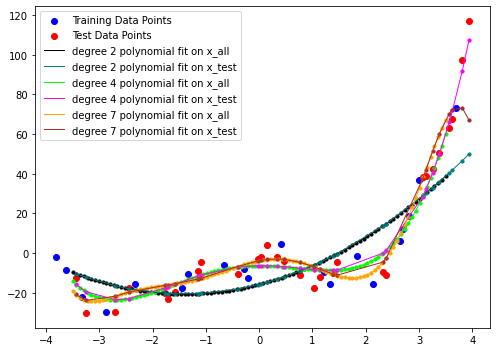

IMPLEMENT ME!
40% data
MSE for order 2 polynomial model on training set is 150.33251286085704
MSE for order 2  polynomial model on test set is 405.80516696165745
MSE for order 4 polynomial model on training set is 31.6245296464469
MSE for order 4  polynomial model on test set is 33.16428295918744
MSE for order 7 polynomial model on training set is 25.492718751653634
MSE for order 7  polynomial model on test set is 61.237418845510426


<Figure size 432x288 with 0 Axes>

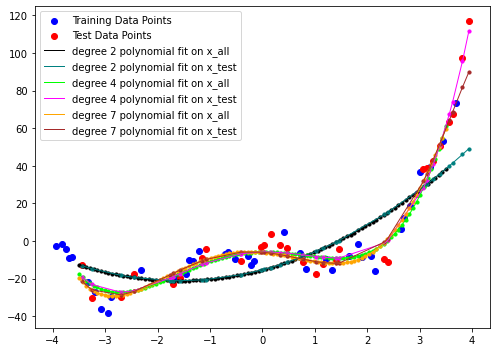

IMPLEMENT ME!
60% data
MSE for order 2 polynomial model on training set is 150.08383759141728
MSE for order 2  polynomial model on test set is 403.2513784833407
MSE for order 4 polynomial model on training set is 29.1928057399479
MSE for order 4  polynomial model on test set is 31.781415416196726
MSE for order 7 polynomial model on training set is 26.099088642454408
MSE for order 7  polynomial model on test set is 60.16667237664542


<Figure size 432x288 with 0 Axes>

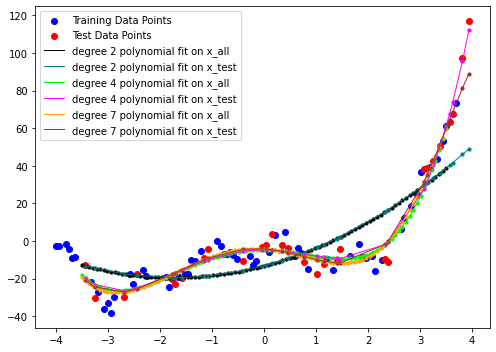

IMPLEMENT ME!
80% data
MSE for order 2 polynomial model on training set is 168.1188246150281
MSE for order 2  polynomial model on test set is 407.59369688184694
MSE for order 4 polynomial model on training set is 29.305108483323444
MSE for order 4  polynomial model on test set is 32.518106868742585
MSE for order 7 polynomial model on training set is 26.549129596283638
MSE for order 7  polynomial model on test set is 48.0769352971077


<Figure size 432x288 with 0 Axes>

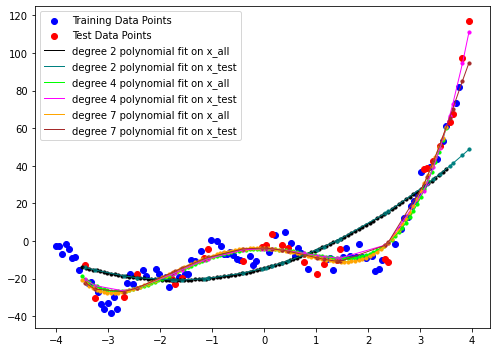

IMPLEMENT ME!
100% data
MSE for order 2 polynomial model on training set is 247.29679797371534
MSE for order 2  polynomial model on test set is 320.0640834697786
MSE for order 4 polynomial model on training set is 31.72001805729004
MSE for order 4  polynomial model on test set is 31.292082886606718
MSE for order 7 polynomial model on training set is 30.677193592109738
MSE for order 7  polynomial model on test set is 33.410694077690145


<Figure size 432x288 with 0 Axes>

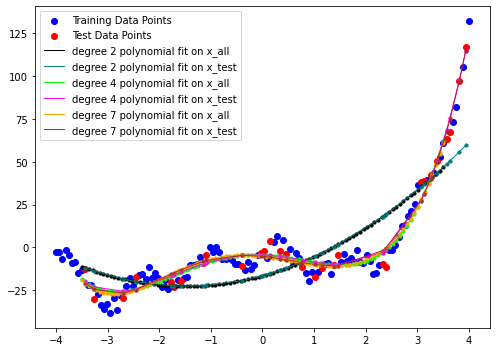

IMPLEMENT ME!


In [31]:
# Study the effects of the training data size on the bias and variance
print("20% data")
train_rmses_20, test_rmses_20 = plot_curves(x_train[40:60], y_train[40:60], x_test, y_test)
print("40% data")
train_rmses_40, test_rmses_40 = plot_curves(x_train[30:70], y_train[30:70], x_test, y_test)
print("60% data")
train_rmses_60, test_rmses_60 = plot_curves(x_train[20:80], y_train[20:80], x_test, y_test)
print("80% data")
train_rmses_80, test_rmses_80 = plot_curves(x_train[10:90], y_train[10:90], x_test, y_test)
print("100% data")
train_rmses_100, test_rmses_100 = plot_curves(x_train, y_train, x_test, y_test)

Text(0, 0.5, 'Log MSE')

<Figure size 432x288 with 0 Axes>

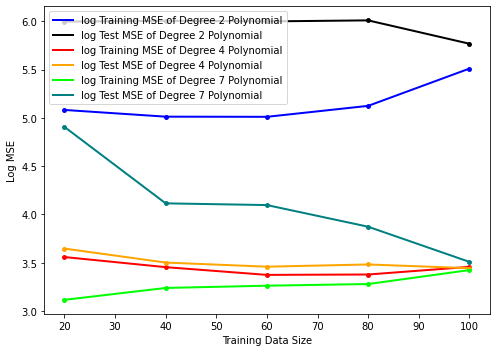

In [32]:
size_data=np.array([20,40,60,80,100])

train_mses_power_2 = np.log([train_rmses_20[0],train_rmses_40[0],train_rmses_60[0],train_rmses_80[0],train_rmses_100[0]])
train_mses_power_4 = np.log([train_rmses_20[1],train_rmses_40[1],train_rmses_60[1],train_rmses_80[1],train_rmses_100[1]])
train_mses_power_7 = np.log([train_rmses_20[2],train_rmses_40[2],train_rmses_60[2],train_rmses_80[2],train_rmses_100[2]])

test_mses_power_2 = np.log([test_rmses_20[0],test_rmses_40[0],test_rmses_60[0],test_rmses_80[0],test_rmses_100[0]])
test_mses_power_4 = np.log([test_rmses_20[1],test_rmses_40[1],test_rmses_60[1],test_rmses_80[1],test_rmses_100[1]])
test_mses_power_7 = np.log([test_rmses_20[2],test_rmses_40[2],test_rmses_60[2],test_rmses_80[2],test_rmses_100[2]])

plt.clf()
plt.figure(figsize=(7, 5))
plt.rcParams["figure.autolayout"] = True

plt.plot(size_data,train_mses_power_2,color='blue',linewidth=2,label="log Training MSE of Degree 2 Polynomial")
plt.scatter(size_data,train_mses_power_2,s=15,color='blue')
plt.plot(size_data,test_mses_power_2,color='black',linewidth=2,label="log Test MSE of Degree 2 Polynomial")
plt.scatter(size_data,test_mses_power_2,s=15,color='black')   

plt.plot(size_data,train_mses_power_4,color='red',linewidth=2,label="log Training MSE of Degree 4 Polynomial")
plt.scatter(size_data,train_mses_power_4,s=15,color='red')
plt.plot(size_data,test_mses_power_4,color='orange',linewidth=2,label="log Test MSE of Degree 4 Polynomial")
plt.scatter(size_data,test_mses_power_4,s=15,color='orange')


plt.plot(size_data,train_mses_power_7,color='lime',linewidth=2,label="log Training MSE of Degree 7 Polynomial")
plt.scatter(size_data,train_mses_power_7,s=15,color='lime') 
plt.plot(size_data,test_mses_power_7,color='teal',linewidth=2,label="log Test MSE of Degree 7 Polynomial")
plt.scatter(size_data,test_mses_power_7,s=15,color='teal') 

plt.legend(loc='upper left')
plt.xlabel('Training Data Size')
plt.ylabel('Log MSE')



**(c)**
**2nd Order Polynomial**
For the second order polynomial, the training log MSE is generally stable and increases as more data points are being added. The Test Log MSE starts pretty high and starts reducing when more training data is added. So adding more training data is resulting in a better performance on unseen data. However, the Log MSE is still much higher than the other polynomial models. So, the model complexity is probably not good enough to capture the relationship between the variables. This is a case of underfitting.

**4th Order Polynomial**
For the 4th order polynomial,both the training and test Log MSE are nearly the same (Log Test MSE is slightly higher than Log Training MSE) and reduces slightly as we increase the no. of training data points. However, after a while, it stabilizes and becomes more or less constant. As the gap between Training and Test Log MSEs is very small and more or less constant, this is probably a better fit model than the other models.

**7th Order Polynomial**
For the 7th Order Polynomial, the training error is very less and the test error is much higher with small training data size. As the no. of training data points is increased, the test error reduces which means the model is performing better now on unseen data. But the training error increases with increase in training data points. The gap between the training and test errors indicates that the model performs better on the train data which is a sign that the model is overfit.  



### Question 3: Stochastic Gradient Descent Improvements (10 pts)

1. (5 pts) Read this [blog](https://medium.com/optimization-algorithms-for-deep-neural-networks/gradient-descent-with-momentum-dce805cd8de8) on medium and describe in your own words how momentum leads to a faster convergence of the loss function. 

**Answer**
We can note that standard procedure for gradient descent tends to overshoot regions which aren't scaled properly, more formally called as pathological curvatures. In such situation, there's a need to approach the optimum in small steps. Progress along certain direction tends to zero and in these regions, gradient descent would fumble. Instead, by using exponetially weighted average (dw and db) values, we tend to average the oscillations in the vertical direction closer to zero as they are in both (positive & negative) directions. Momentum enables our algorithm to take a straighter forward path to local optima and to damp out vertical oscillations. Because of this the algorithm will end up with a few iterations at local optima.

2. (5 pts) Read this [blog](https://sweta-nit.medium.com/batch-mini-batch-and-stochastic-gradient-descent-e9bc4cacd461) on medium and explain in your own words the advantages of Mini-batch Stochastic Gradient Descent. 

**Answer**

Advantages:
1. The model update frequency is higher than BGD: In MGD, we are not waiting for entire data, we are just passing 50 records or 200 or 100 or 256, then we are passing for optimization.
2. The batching allows both efficiency of not having all training data in memory and algorithms implementations. We are controlling memory consumption as well to store losses for each and every datasets.
3. The batches updates provide a computationally more efficient process than SGD.

# Question 4: Stochastic Gradient Descent (30 pts)

1.(**10 pts**) Stochastic gradient descent derivation<br>

Use stochastic gradient descent to derive the coefficent updates for the 4 coefficients $w_0, w_1, w_2, w_3$ in this model：

$$ y = w_0 + w_1e^{-x_1} + w_2 x_1 + w_3x_1x_2 $$ 


2.(**20 pts**) Stochastic gradient descent coding <br>

Code an SGD solution in Python for this non-linear model$$ y = w_0 + w_1e^{-x_1} + w_2x_1 + w_3x_1x_2 $$  The template of the solution class is given. The init function of the class takes as input the learning rate, regularization constant and number of epochs. The fit method must take as input X, y. The predict method takes an X value (optionally, an array of values). 

a) (**15 pts**) Use the expression derived in part 1 to predict the data given in 'SGD_samples.csv', for 15 epochs, using learning rates: [0, .0001, .001, .01, 0.1, 1, 10, 100] and regularization (ridge regression) constants: [0,10,100]. For the best 2 combinations of learning_rate and regularization for SGD, plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) . 

b) (**5 pts**) Report the MSE of the two best combinations of learning rate and regularization constant.

**Answer**
1.

In [16]:
class PDF(object):
  def __init__(self, pdf, size=(200,200)):
    self.pdf = pdf
    self.size = size

  def _repr_html_(self):
    return '<iframe src={0} width={1[0]} height={1[1]}></iframe>'.format(self.pdf, self.size)

  def _repr_latex_(self):
    return r'\includegraphics[width=1.0\textwidth]{{{0}}}'.format(self.pdf)

PDF('Q4.pdf',size=(500,700))

In [17]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from operator import itemgetter
warnings.filterwarnings("ignore")

class Regression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        # initialize whichever variables you would need here
        self.coef = np.zeros(4)
        
    def sgd(self, gradient):
        self.coef # = please put your codes here to update the self.coef using SGD
        self.coef = self.coef - self.learning_rate * gradient
    
    def fit(self, X, y, update_rule='sgd', plot=False):
        mse = []
        coefs = []
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                
                # Compute error
                #please put your codes here
                error = y[i]-(np.matmul(X[i],self.coef.T))

                # Compute gradients
                #removing intercept w0 for regularization
                coef_reg=self.coef.copy()
                coef_reg[0]=0
                #gradient = (-2/X.shape[0] * X[i]) * (error)
                gradient= error*X[i] + 2*(self.regularization)*coef_reg
               
                # Update weights
                self.sgd(-gradient)

            coefs.append(self.coef)
            residuals = y - self.linearPredict(X)         
            mse.append(np.mean(residuals**2))

        self.lowest_mse = mse[-1]
        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')

    def get_features(self, X):
        '''
        this output of this function can be used to compute the gradient in `fit`
        '''
        x = np.zeros((X.shape[0], 4))
        x[:,0] = 1
        x[:,1] = X[:,0]
        x[:,2] = X[:,0]*X[:,1]
        x[:,3] = np.exp(-X[:,0])
        
        return x
        
    def linearPredict(self, X):
        return (np.dot(X,self.coef)) 
                     

In [18]:
data = pd.read_csv('SGD_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 15
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]



cols=['Learning Rate','Regularization','Epochs','MSE']
lst=[]
index=0

for i in range(len(learning_rate)):
    for j in range(len(regularization)):
        model=Regression(learning_rate[i],regularization[j],15)
        model.fit(X,y,update_rule='sgd',plot=False)
        lst.append([learning_rate[i],regularization[j],15,model.lowest_mse])
        mse_table = pd.DataFrame(lst, columns=cols)
        index=index+1

In [19]:
mse_table

,Learning Rate,Regularization,Epochs,MSE
0,0.0001,0,15,3.682051e-02
1,0.0001,10,15,1.287101e+08
2,0.0001,100,15,1.264873e+122
3,0.0010,0,15,3.049599e-02
4,0.0010,10,15,7.824039e+121
5,0.0010,100,15,NaN
6,0.0100,0,15,2.739109e-02
7,0.0100,10,15,NaN
8,0.0100,100,15,NaN
9,0.1000,0,15,3.098763e-02


# Answer :

So, clearly from the above table, **lowest MSE is when learning_rate=0.0100, regularization=0,epochs=15**.

Also, **second lowest MSE is observed when learning_rate=0.0010, regularization=0,epochs=15**.

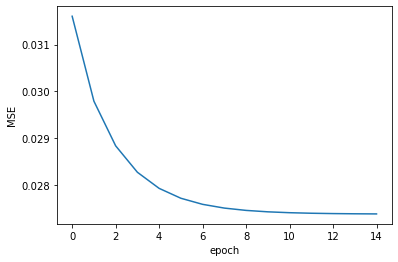

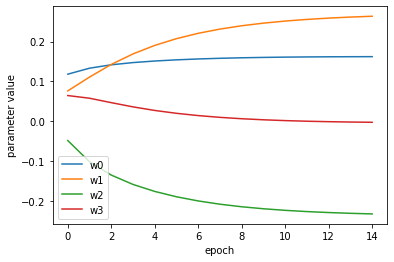

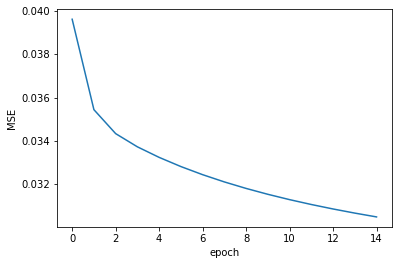

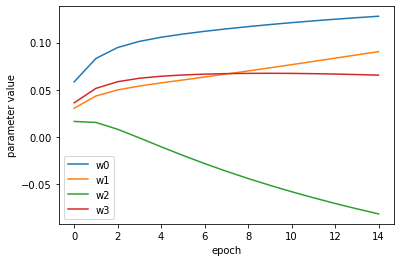

In [23]:
model1=Regression(0.01,0,15)
model1.fit(X,y,update_rule='sgd',plot=True)

model2=Regression(0.001,0,15)
model2.fit(X,y,update_rule='sgd',plot=True)

In [24]:
print('The lowest MSE is',mse_table['MSE'].min(),)
print('The second lowest MSE is',mse_table['MSE'].nsmallest(2).iloc[-1])

The lowest MSE is 0.027391087575201013
The second lowest MSE is 0.030495991520073516
